In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("wordnet")
df = pd.read_csv("../spam.csv", encoding="latin-1", usecols=["v1","v2"])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


+About Dataset
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text


Reference:</br>
demo code : https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network/?ref=header_search</br>
introduction: https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975</br>

Link Data: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [2]:

#note dataset the label (ham (legitimate) or spam) 
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Rename the Features
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)
df.head(5)

,output,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 📊 Exploratory Data Analysis 📊

In [4]:
# Shape of the Dataset
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   object
 1   input   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Check Null Values
df.isnull().sum()

output    0
input     0
dtype: int64

In [7]:
# Check Duplicate Values
df.duplicated().sum()

403

In [8]:
# Drop Duplicates
df = df.drop_duplicates(keep="first") #keep data appeared for the first time
df.shape

(5169, 2)

In [9]:
df.head()

,output,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Ham & Spam Counts
df["output"].value_counts()

ham     4516
spam     653
Name: output, dtype: int64

# 🥧 Pie Chart 📈

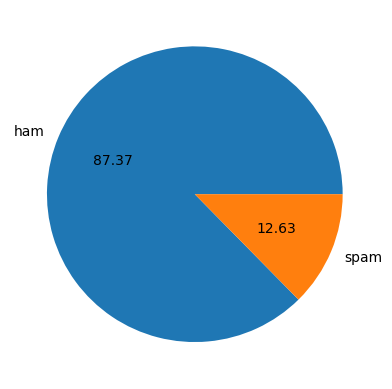

In [11]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

# ➕ Feature Construction: New Features ➕

In [12]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)

In [13]:
# Total No. of Words in Data

df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [14]:
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
df.head(5)

,output,input,characters,word,sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
# Encoding Target Feature 

le = LabelEncoder() # là một công cụ trong thư viện scikit-learn được sử dụng để chuyển đổi nhãn (labels) dạng chuỗi thành dạng số nguyên
df["output"] = le.fit_transform(df["output"])

# 📊 Histogram Plot 📊

In [17]:
# Statistical Analysis for HAM Data
df[df["output"]==0][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
# Statistical Analysis for SPAM Data
df[df["output"] ==1][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


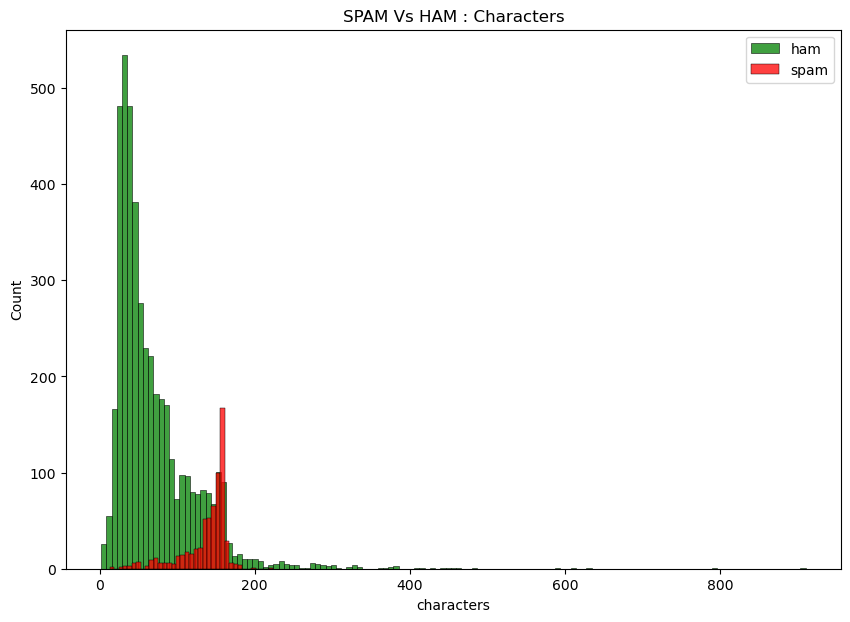

In [19]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

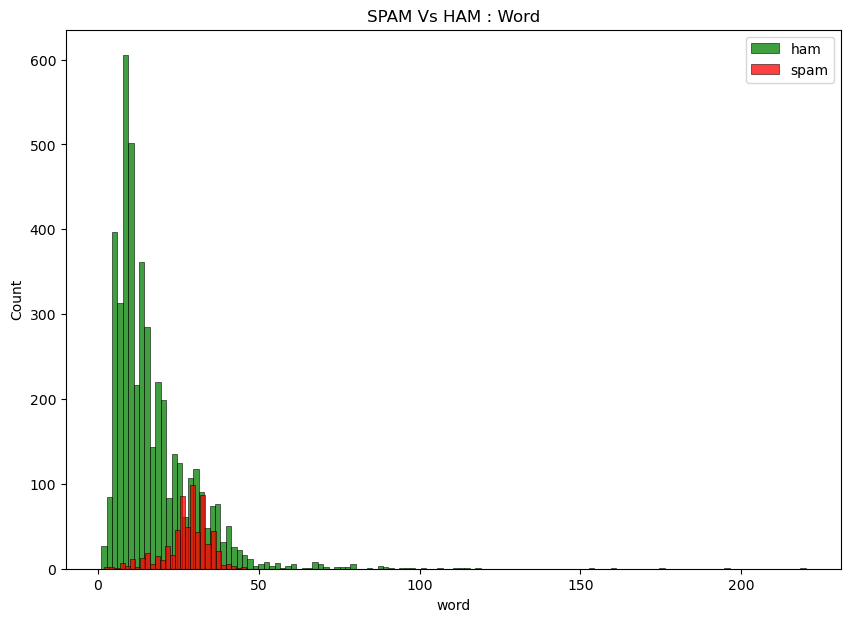

In [20]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

In [21]:
# Correlations between features
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\75230921.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,output,characters,word,sentence
output,1.000000,0.384717,0.262912,0.263939
characters,0.384717,1.000000,0.965760,0.624139
word,0.262912,0.965760,1.000000,0.679971
sentence,0.263939,0.624139,0.679971,1.000000


In [22]:
import numpy as np

class Perceptron:#Đây là định nghĩa của lớp Perceptron
    
    def __init__(self, learning_rate=0.002, epochs=1000): 
        #Phương thức khởi tạo của lớp Perceptron. Nó khởi tạo các thuộc tính của lớp như trọng số (weights), độ lệch (bias), tốc độ học (learning_rate) và số lượng vòng lặp (epochs). Mặc định, tốc độ học được đặt là 0.001 và số lượng vòng lặp là 1000.
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, z):
        #Đây là hàm kích hoạt của Perceptron, cụ thể là hàm Heaviside, được sử dụng để chuyển đổi đầu vào của Perceptron thành đầu ra nhị phân (0 hoặc 1) dựa trên ngưỡng (trong trường hợp này là 0).
        return np.heaviside(z, 0)
#Phương thức fit của lớp Perceptron. Nó nhận dữ liệu huấn luyện X và nhãn y và huấn luyện mô hình Perceptron để phù hợp với dữ liệu huấn luyện đã cho
    def fit(self, X, y):
        #Dòng đầu tiên tính số lượng cột trong ma trận đặc trưng X. Dòng thứ hai khởi tạo trọng số ban đầu với tất cả các giá trị là 0, có số lượng cột bằng số lượng đặc trưng trong dữ liệu
        columns = X.shape[1]
        # This will give the number of columns in 2-d array 
        # Initializing weights and bias with zeros
        self.weights = np.zeros(columns)
        self.bias = 0
        
        # Iterating through the entire training set for the specified number of epochs
        for _ in range(self.epochs):
            # Traversing through the entire training set
            for i in range(len(X)):
                #Tính toán giá trị đầu vào của Perceptron bằng cách tích vô hướng của đặc trưng với trọng số và thêm độ lệch
                z = np.dot(X[i], self.weights) + self.bias  # Finding the dot product and adding the bias
                #Sử dụng hàm kích hoạt để dự đoán đầu ra của Perceptron dựa trên giá trị đầu vào đã tính toán.
                y_pred = self.activation(z)  # Passing through an activation function
                
                # Updating weights and bias
                #Cập nhật trọng số và độ lệch của Perceptron dựa trên sai số giữa dự đoán và nhãn thực tế, sử dụng tốc độ học để điều chỉnh sự cập nhật.
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred)
                
        return self.weights, self.bias
    #Phương thức predict nhận đầu vào X và dự đoán nhãn của mỗi mẫu trong X bằng cách sử dụng trọng số và độ lệch đã học được và áp dụng hàm kích hoạt để chuyển đổi giá trị dự đoán thành đầu ra nhị phân.
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
    
    def correlation_coefficient(self, X, y):
        y_pred = self.predict(X)
        correlation_matrix = np.corrcoef(np.vstack((y, y_pred)))
        correlation_coefficient = correlation_matrix[0, 1]
        return correlation_coefficient


TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer là một phương pháp chuyển đổi văn bản thành vectơ số dựa trên tần suất của các từ trong văn bản đó và trong toàn bộ tập dữ liệu. Nó thường được sử dụng trong xử lý ngôn ngữ tự nhiên và học máy để biểu diễn văn bản dưới dạng vectơ số để có thể sử dụng các thuật toán học máy.

Cụ thể, quá trình chuyển đổi của TF-IDF Vectorizer là như sau:

TF (Term Frequency - Tần suất của từ): Tính tần suất xuất hiện của từ trong mỗi văn bản. Nó đo lường mức độ quan trọng của mỗi từ trong mỗi văn bản.

IDF (Inverse Document Frequency - Tần suất ngược của tài liệu): Tính toán giá trị ngược của tần suất của từ trên toàn bộ tập dữ liệu. Nó giúp giảm trọng số của các từ phổ biến xuất hiện trong hầu hết các văn bản.

TF-IDF Score: Tích của TF và IDF, được sử dụng để biểu diễn mức độ quan trọng của từ đó trong văn bản và trên toàn bộ tập dữ liệu.

TF-IDF Vectorizer xử lý các văn bản đầu vào và tạo ra một ma trận trong đó mỗi hàng tương ứng với một văn bản và mỗi cột tương ứng với một từ trong từ điển của tất cả các từ trong tập dữ liệu. Giá trị trong ma trận là các giá trị TF-IDF của từng từ trong mỗi văn bản. Điều này tạo ra một biểu diễn vectơ số cho mỗi văn bản, mà có thể được sử dụng để huấn luyện các mô hình học máy như phân loại văn bản, gom nhóm văn bản, và nhiều ứng dụng khác.

In [23]:
tfidv = TfidfVectorizer(max_features=3000)

In [24]:
# Independent Feature
selected_columns = ["characters","word", "sentence"]
selected_df = df[selected_columns]
X = tfidv.fit_transform(df["input"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Dependent Feature
y = df["output"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
# # Sample email dataset (features: [number of characters, number of word, number of sentence])


# Create and train Perceptron
perceptron = Perceptron()
perceptron.fit(X, y)
predictions = perceptron.predict(X_test)

# Calculate correlation coefficient
correlation_coefficient = perceptron.correlation_coefficient(X, y)
print("Correlation Coefficient:", correlation_coefficient)
for i, predictions in enumerate(predictions):
    if predictions == 0:
        print("Not Spam")
    else:
        print("Spam")

Correlation Coefficient: 0.9973690417887688
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Not 